# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")




Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zakamensk
Processing Record 2 of Set 1 | imbituba
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | maceio
Processing Record 7 of Set 1 | camana
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | skutskar
City not found. Skipping...
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | mazagao
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | arish
Processing Record 15 of Set 1 | kirensk
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | port macquarie
Processing Record 18 of Set 1 | broken hill
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | sisimiut
Processing Record 21 of Set 1 | sungailiat
Process

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zakamensk,50.3741,103.2863,244.91,99,59,0.49,RU,1702248881
1,imbituba,-28.2400,-48.6703,292.97,96,100,4.87,BR,1702248881
2,iqaluit,63.7506,-68.5145,268.00,79,100,5.14,CA,1702248882
3,petropavlovsk-kamchatsky,53.0452,158.6483,274.48,95,100,6.71,RU,1702248883
4,adamstown,-25.0660,-130.1015,294.23,58,0,4.33,PN,1702248823


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zakamensk,50.3741,103.2863,244.91,99,59,0.49,RU,1702248881
1,imbituba,-28.2400,-48.6703,292.97,96,100,4.87,BR,1702248881
2,iqaluit,63.7506,-68.5145,268.00,79,100,5.14,CA,1702248882
3,petropavlovsk-kamchatsky,53.0452,158.6483,274.48,95,100,6.71,RU,1702248883
4,adamstown,-25.0660,-130.1015,294.23,58,0,4.33,PN,1702248823


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

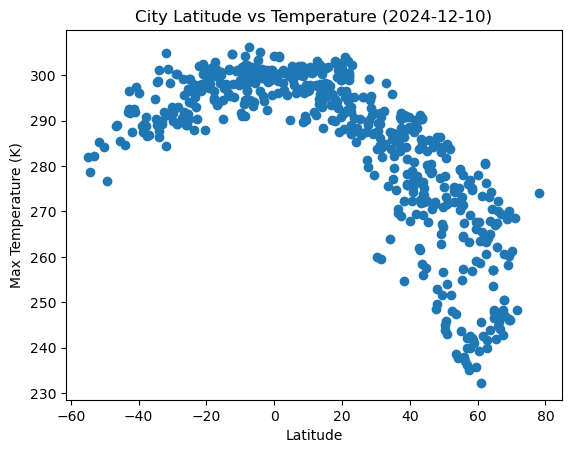

In [29]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
Temp = city_data_df['Max Temp']

plt.scatter(latitude,Temp)

# Incorporate the other graph properties
plt.title('City Latitude vs Temperature (2024-12-10)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

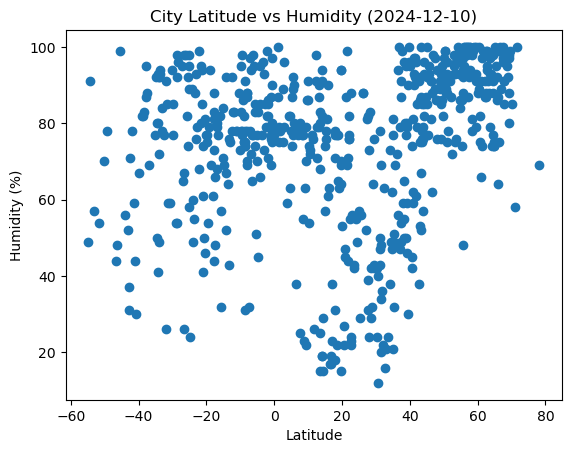

In [30]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
Humidity = city_data_df['Humidity']

plt.scatter(latitude,Humidity)

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2024-12-10)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

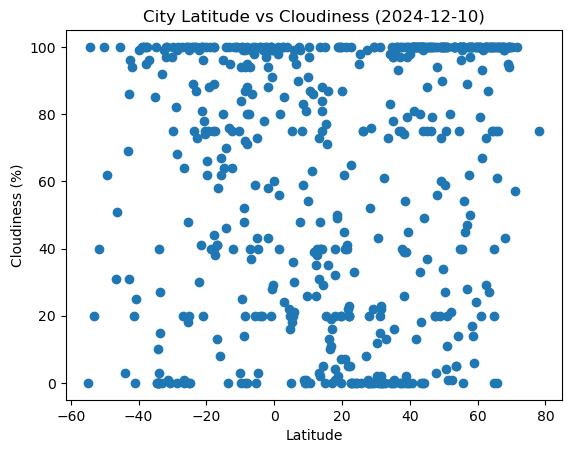

In [31]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
Cloudiness = city_data_df['Cloudiness']

plt.scatter(latitude,Cloudiness)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2024-12-10)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

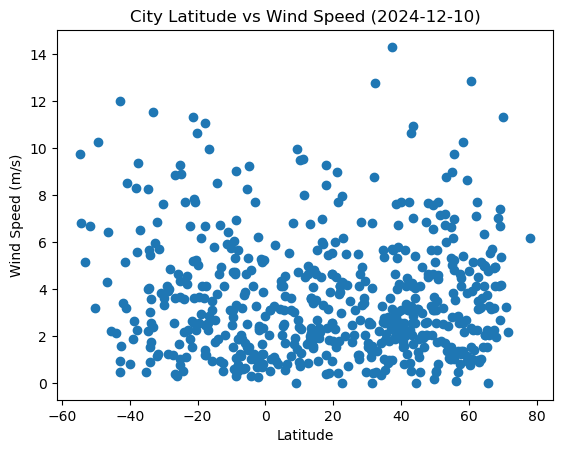

In [32]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

plt.scatter(latitude,wind_speed)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2024-12-10)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def linregress_plot (x_values, y_values, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show()
    return(linregress_plot)

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zakamensk,50.3741,103.2863,244.91,99,59,0.49,RU,1702248881
2,iqaluit,63.7506,-68.5145,268.00,79,100,5.14,CA,1702248882
3,petropavlovsk-kamchatsky,53.0452,158.6483,274.48,95,100,6.71,RU,1702248883
7,vilyuchinsk,52.9306,158.4028,275.30,98,100,1.71,RU,1702248850
11,arish,31.1316,33.7984,291.67,47,20,1.09,EG,1702248889


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,imbituba,-28.2400,-48.6703,292.97,96,100,4.87,BR,1702248881
4,adamstown,-25.0660,-130.1015,294.23,58,0,4.33,PN,1702248823
5,maceio,-9.6658,-35.7353,298.84,83,0,3.09,BR,1702248884
6,camana,-16.6228,-72.7111,293.98,77,58,2.85,PE,1702248885
8,port-aux-francais,-49.3500,70.2167,276.76,78,62,10.28,TF,1702248806


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8212330034732159


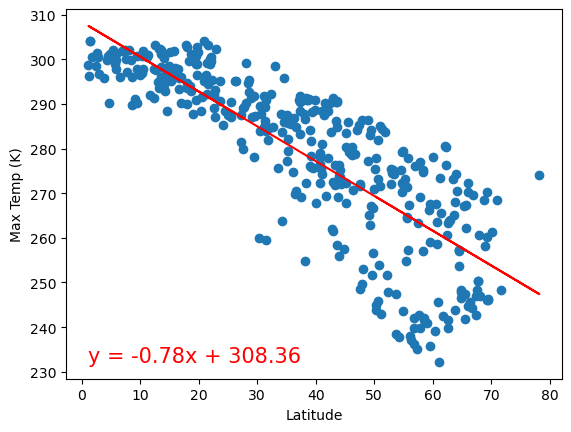

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linregress_plot(x_values,y_values,'Max Temp (K)')

The r-value is: 0.6978011514289013


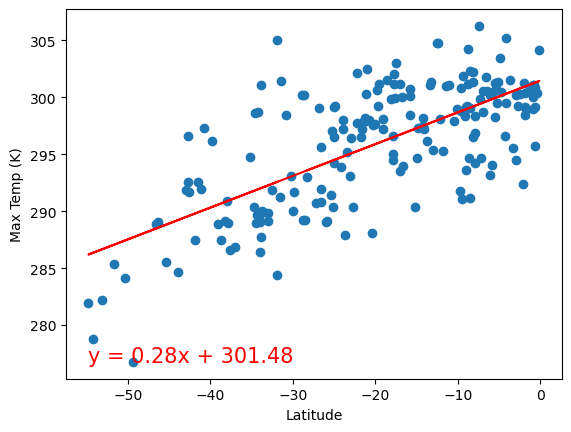

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linregress_plot(x_values,y_values,'Max Temp (K)')

**Discussion about the linear relationship:** 

The linear regression in the above two figures is modeling the relationship between latitude and temperature. As a city gets further away from the equator (Latitude = 0) the temperature tends to decrease.

In both plots there is a strong linear relationship between a city's latitude and the temperature. The r-value for the northern and southern hemisphere is -0.82 and 0.70 respectively, indicating a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44211366113711376


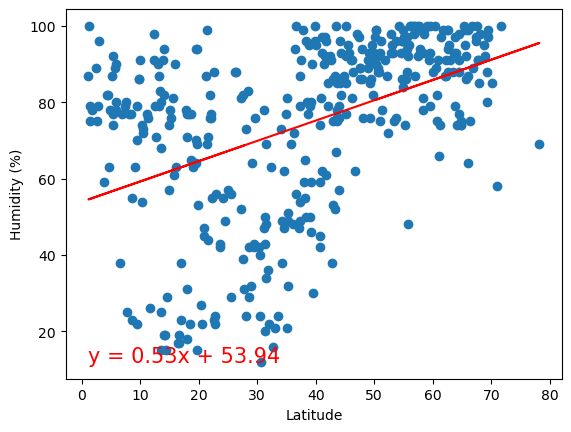

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linregress_plot(x_values,y_values,'Humidity (%)')

The r-value is: 0.21752208497617687


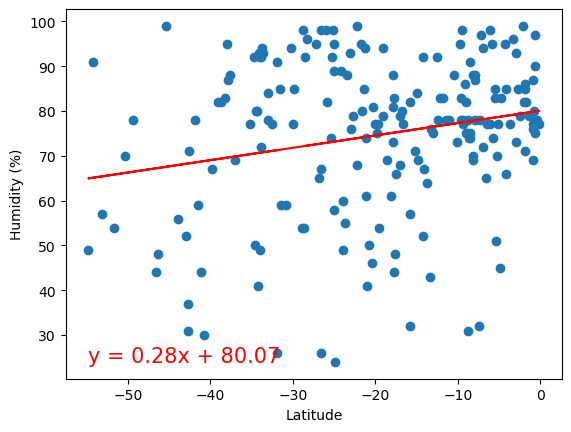

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linregress_plot(x_values,y_values,'Humidity (%)')

**Discussion about the linear relationship:** 
The linear regression in the above two figures is modeling the relationship between latitude and humidity. As a city gets further away from the equator (Latitude = 0) there is no real correlation to the humidity.

In both plots there is a weak correlation between a city's latitude and the humidity. The r-value for the northern and southern hemisphere is 0.44 and 0.22 respectively, indicating a weak correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3377124955790601


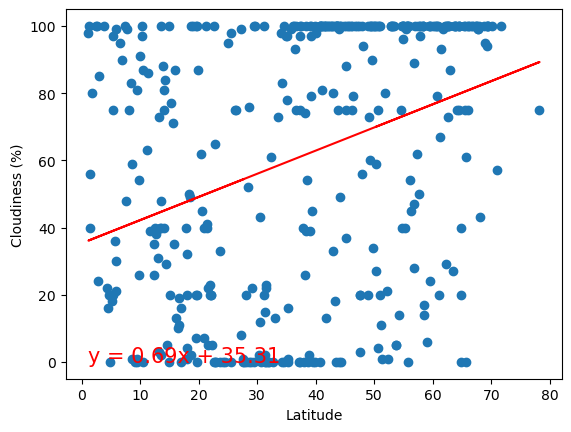

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linregress_plot(x_values,y_values,'Cloudiness (%)')

The r-value is: 0.15465809530570088


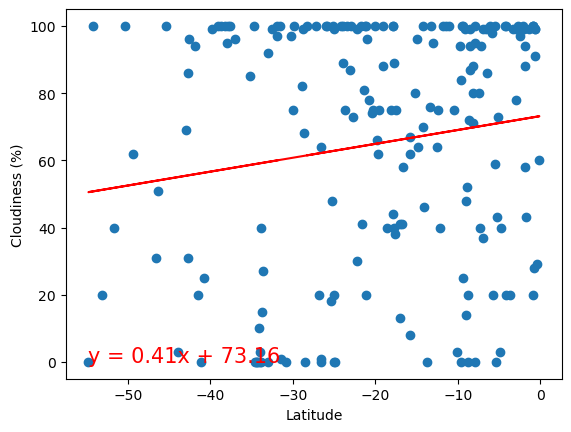

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linregress_plot(x_values,y_values,'Cloudiness (%)')

**Discussion about the linear relationship:** 
The linear regression in the above two figures is modeling the relationship between latitude and cloudiness. As a city gets further away from the equator (Latitude = 0) there is no real correlation to the cloudiness.

In both plots there is a weak correlation between a city's latitude and the cloudiness. The r-value for the northern and southern hemisphere is 0.34 and 0.15 respectively, indicating a weak correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09221962409339006


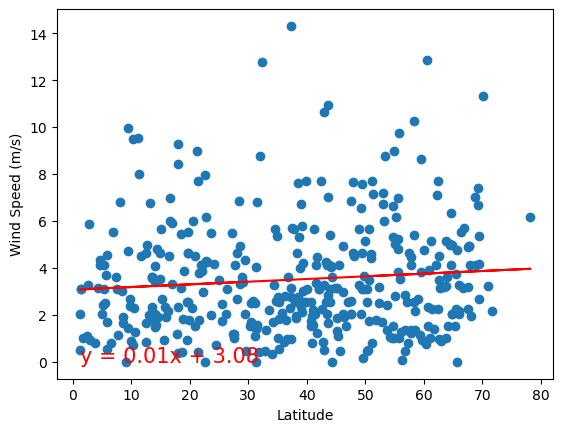

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linregress_plot(x_values,y_values,'Wind Speed (m/s)')

The r-value is: -0.23859494705031245


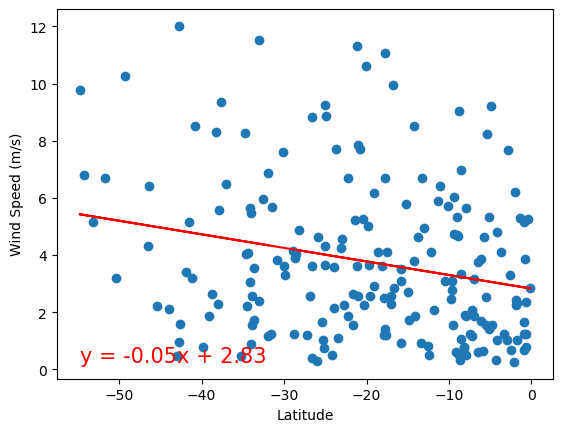

<function __main__.linregress_plot(x_values, y_values, ylabel)>

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linregress_plot(x_values,y_values,'Wind Speed (m/s)')

**Discussion about the linear relationship:** 
The linear regression in the above two figures is modeling the relationship between latitude and wind speed. As a city gets further away from the equator (Latitude = 0) there is no real correlation to the wind speed.

In both plots there is a weak correlation between a city's latitude and the wind speed. The r-value for the northern and southern hemisphere is 0.09 and -0.24 respectively, indicating a weak or no correlation between latitude and wind speed.